<a href="https://colab.research.google.com/github/ManjotSran/Handwritten-Digit-Recognition-using-CNN/blob/main/Project_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

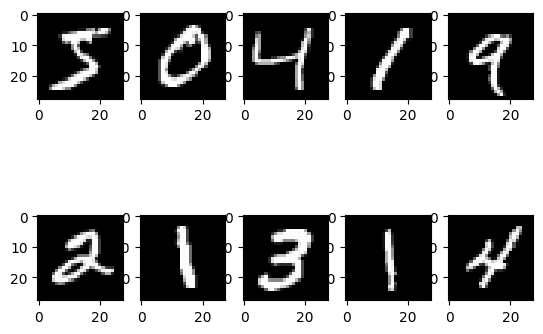

In [3]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# create a 2x5 grid for subplots
plt.subplot(251)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(252)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(253)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(254)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(255)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(256)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(257)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(258)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(259)
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))
plt.subplot(2,5,10)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()


In [4]:
# Baseline Model with Multi-Layer Perceptrons

In [5]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [7]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define baseline model
def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [12]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [13]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 5s - loss: 0.2749 - accuracy: 0.9215 - val_loss: 0.1359 - val_accuracy: 0.9623 - 5s/epoch - 17ms/step
Epoch 2/10
300/300 - 4s - loss: 0.1090 - accuracy: 0.9690 - val_loss: 0.0973 - val_accuracy: 0.9705 - 4s/epoch - 14ms/step
Epoch 3/10
300/300 - 5s - loss: 0.0711 - accuracy: 0.9796 - val_loss: 0.0824 - val_accuracy: 0.9743 - 5s/epoch - 16ms/step
Epoch 4/10
300/300 - 4s - loss: 0.0492 - accuracy: 0.9860 - val_loss: 0.0665 - val_accuracy: 0.9806 - 4s/epoch - 14ms/step
Epoch 5/10
300/300 - 4s - loss: 0.0357 - accuracy: 0.9901 - val_loss: 0.0626 - val_accuracy: 0.9811 - 4s/epoch - 14ms/step
Epoch 6/10
300/300 - 5s - loss: 0.0266 - accuracy: 0.9927 - val_loss: 0.0654 - val_accuracy: 0.9790 - 5s/epoch - 16ms/step
Epoch 7/10
300/300 - 4s - loss: 0.0191 - accuracy: 0.9954 - val_loss: 0.0569 - val_accuracy: 0.9816 - 4s/epoch - 14ms/step
Epoch 8/10
300/300 - 4s - loss: 0.0152 - accuracy: 0.9966 - val_loss: 0.0583 - val_accuracy: 0.9814 - 4s/epoch - 14ms/step
Epoch 9/10
300/3

In [15]:
# We can see although that our multi-layer perceptron model did performed well. But, Now we will see how to build more sophosticated convoultional neural networks.

In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [17]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [18]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [20]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [21]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 29s - loss: 0.2400 - accuracy: 0.9308 - val_loss: 0.0735 - val_accuracy: 0.9787 - 29s/epoch - 97ms/step
Epoch 2/10
300/300 - 28s - loss: 0.0738 - accuracy: 0.9783 - val_loss: 0.0481 - val_accuracy: 0.9837 - 28s/epoch - 92ms/step
Epoch 3/10
300/300 - 27s - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0485 - val_accuracy: 0.9832 - 27s/epoch - 89ms/step
Epoch 4/10
300/300 - 26s - loss: 0.0407 - accuracy: 0.9871 - val_loss: 0.0443 - val_accuracy: 0.9861 - 26s/epoch - 87ms/step
Epoch 5/10
300/300 - 26s - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0421 - val_accuracy: 0.9856 - 26s/epoch - 87ms/step
Epoch 6/10
300/300 - 26s - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0346 - val_accuracy: 0.9885 - 26s/epoch - 88ms/step
Epoch 7/10
300/300 - 27s - loss: 0.0234 - accuracy: 0.9928 - val_loss: 0.0301 - val_accuracy: 0.9901 - 27s/epoch - 90ms/step
Epoch 8/10
300/300 - 26s - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0350 - val_accuracy: 0.9889 - 26s/epoch - 87ms/step


In [22]:
# Network achieves an error rate of 1.01%, which is better than our simple multi-layer perceptron model above.

In [23]:
# Now, We will build Larger Convolutional Neural Network for MNIST to get the the near perfect results

In [30]:
# Larger CNN for the MNIST Dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [31]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [32]:
# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Conv2D(15, (3, 3), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [33]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 34s 110ms/step - loss: 0.3982 - accuracy: 0.8763 - val_loss: 0.0757 - val_accuracy: 0.9768
Epoch 2/10
300/300 [==============================] - 32s 106ms/step - loss: 0.0941 - accuracy: 0.9715 - val_loss: 0.0498 - val_accuracy: 0.9833
Epoch 3/10
300/300 [==============================] - 32s 106ms/step - loss: 0.0670 - accuracy: 0.9796 - val_loss: 0.0425 - val_accuracy: 0.9860
Epoch 4/10
300/300 [==============================] - 31s 104ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.0386 - val_accuracy: 0.9870
Epoch 5/10
300/300 [==============================] - 30s 101ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0322 - val_accuracy: 0.9888
Epoch 6/10
300/300 [==============================] - 31s 104ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0290 - val_accuracy: 0.9897
Epoch 7/10
300/300 [==============================] - 31s 103ms/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.0297 - val_ac

In [28]:
# So, our large CNN model is giving an error rate of 0.81% which is pretty good. 

In [34]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Get the predicted labels for the test set
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Get the actual labels for the test set
true_labels = np.argmax(y_test, axis=1)

# Compare predicted labels with actual labels
for i in range(len(predicted_labels)):
    print("Actual Label: {}, Predicted Label: {}".format(true_labels[i], predicted_labels[i]))

Epoch 1/10
300/300 [==============================] - 31s 102ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0237 - val_accuracy: 0.9921
Epoch 2/10
300/300 [==============================] - 31s 103ms/step - loss: 0.0259 - accuracy: 0.9914 - val_loss: 0.0240 - val_accuracy: 0.9927
Epoch 3/10
300/300 [==============================] - 31s 104ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0260 - val_accuracy: 0.9923
Epoch 4/10
300/300 [==============================] - 30s 101ms/step - loss: 0.0221 - accuracy: 0.9923 - val_loss: 0.0221 - val_accuracy: 0.9930
Epoch 5/10
300/300 [==============================] - 31s 103ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0257 - val_accuracy: 0.9918
Epoch 6/10
300/300 [==============================] - 31s 105ms/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0218 - val_accuracy: 0.9933
Epoch 7/10
300/300 [==============================] - 31s 103ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0245 - val_ac

NameError: ignored

Epoch 1/10
300/300 [==============================] - 31s 104ms/step - loss: 0.0143 - accuracy: 0.9949 - val_loss: 0.0272 - val_accuracy: 0.9925
Epoch 2/10
300/300 [==============================] - 31s 103ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0299 - val_accuracy: 0.9912
Epoch 3/10
300/300 [==============================] - 31s 104ms/step - loss: 0.0143 - accuracy: 0.9948 - val_loss: 0.0262 - val_accuracy: 0.9919
Epoch 4/10
300/300 [==============================] - 31s 102ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0247 - val_accuracy: 0.9932
Epoch 5/10
300/300 [==============================] - 31s 102ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0270 - val_accuracy: 0.9919
Epoch 6/10
300/300 [==============================] - 30s 100ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0273 - val_accuracy: 0.9915
Epoch 7/10
300/300 [==============================] - 31s 102ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0240 - val_ac

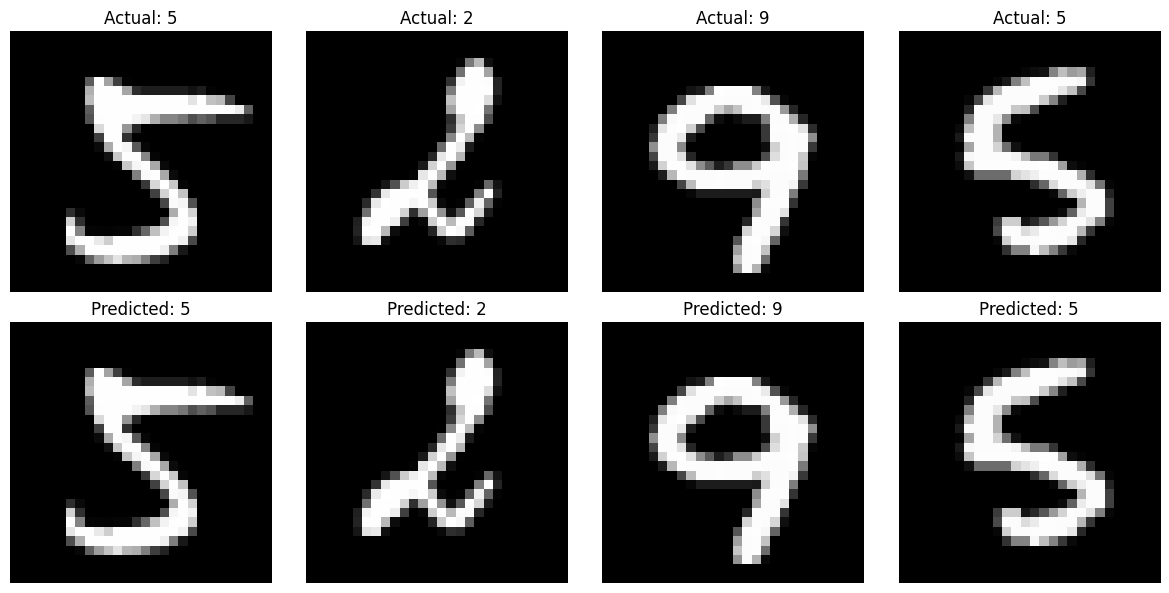

In [36]:
import numpy as np
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Get the predicted labels for the test set
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Display actual images and predicted images
n_images = 4  # Number of images to display
indices = np.random.choice(len(X_test), size=n_images, replace=False)

plt.figure(figsize=(12, 6))
for i, index in enumerate(indices):
    # Display actual image
    plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title("Actual: {}".format(np.argmax(y_test[index])))
    plt.axis("off")

    # Display predicted image
    plt.subplot(2, n_images, n_images + i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title("Predicted: {}".format(predicted_labels[index]))
    plt.axis("off")

plt.tight_layout()
plt.show()